# Download the data

In [1]:
# https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

In [2]:
# !kaggle datasets download -d sakshigoyal7/credit-card-customers

In [3]:
# ls

In [4]:
# !unzip credit-card-customers.zip

In [5]:
# ls

# Read the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BankChurners.csv')

# We will drop two last columns from the table
df = df.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
    axis=1)

In [3]:
# Checking for null values
print(f'The number of null values in dataframe is {df.isnull().sum().sum()}')

The number of null values in dataframe is 0


In [4]:
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [5]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

# Columns description

- CLIENTNUM - Client number. Unique identifier for the customer holding the account
- Attrition_Flag - Internal event (customer activity) variable, Existing Customer or Attrited Customer
- Customer_Age - Demographic variable - Customer's Age in Years
- Gender - Demographic variable - M=Male, F=Female
- Dependent_count - Demographic variable - Number of dependents
- Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status - Demographic variable - Married, Single, Divorced, Unknown
- Income_Category - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > 
- Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book - Period of relationship with bank
- Total_Relationship_Count - Total no. of products held by the customer
- Months_Inactive_12_mon - No. of months inactive in the last 12 months
- Contacts_Count_12_mon - No. of Contacts in the last 12 months
- Credit_Limit - Credit Limit on the Credit Card
- Total_Revolving_Bal - Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1) 
- Total_Trans_Amt - Total Transaction Amount (Last 12 months)
- Total_Trans_Ct - Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1) 
- Avg_Utilization_Ratio - Average Card Utilization Ratio

Your goal is to predict whether the client will churn or not. 

# 1. What is the target column?

- Attrition_Flag
- Marital_Status
- Gender
- Months_on_book
- Avg_Utilization_Ratio

Attrition_Flag

# 2. Transform target column

Transform target column to 1/0 format, 1 if the client will churn, 0 otherwise. What is the percetange of churned customers?

In [6]:
df['Attrition_Flag'].replace(to_replace='Attrited Customer', value=1, inplace=True)
df['Attrition_Flag'].replace(to_replace='Existing Customer',  value=0, inplace=True)

In [7]:
print(f'The percentage of churned customers is {df.Attrition_Flag.mean()*100:.2f}%')

The percentage of churned customers is 16.07%


# Drop `CLIENTNUM` column, as all clients are unique

In [8]:
df = df.drop('CLIENTNUM', axis=1)

# 3. Analyse columns, which are numerical, which are categorical?

How many numerical and categorical columns do you have (excluding target variable)


In [9]:
df.dtypes.value_counts()

int64      10
object      5
float64     5
dtype: int64

Excluding 'Attained_Flag', there are 9 int64, 5 object and 5 float64.

# 4. Perform EDA (optional)

Plot 1-5 Graphs looking for interesting data patterns. Each graph must contain a short description. You can use ChatGPT to generate ideas for graphs. If you use ChatGPT include your prompt into the document. Each of 5 graphs worth 1 point.

Checklist:
1. For each graph:
    1. Graph
        - has title
        - has labels for OX and OY 
        - has legend
    2. Graph description (<100 words)
    3. ChatGPT prompt included (if you've used one)
2. All graphs in a single pdf document

Put all graphs into a single doc file, save it as pdf and upload to the google form. For reference, this whole text is 105 words.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Demography

In [11]:
df_churn = df.query('Attrition_Flag == 1')

In [12]:
print('Percentage of women over all customers is:')
df.Gender.value_counts()[0] / (df.Gender.value_counts()[0] + df.Gender.value_counts()[1])

Percentage of women over all customers is:


0.5290806754221389

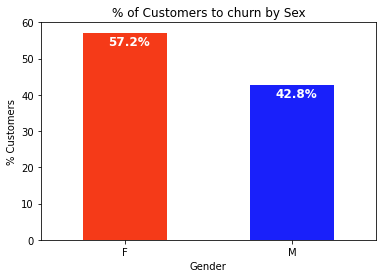

In [13]:
colors = ['#f53a18', '#1920fa']
ax = (df_churn['Gender'].value_counts()*100.0 / len(df_churn)).plot(kind='bar',
                                                       stacked = True,
                                                       rot = 0,
                                                       color = colors)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

ax.set_title('% of Customers to churn by Sex');

## 2. Level of income

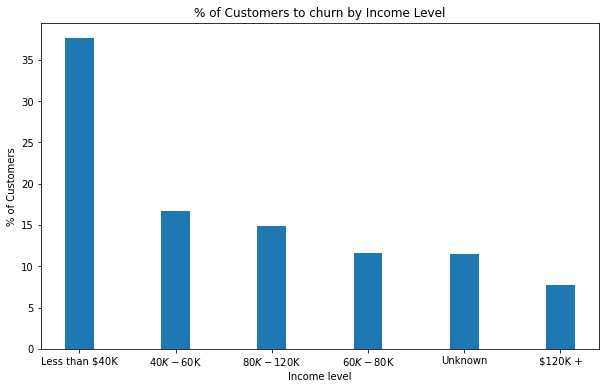

In [14]:
ax = (df_churn['Income_Category'].value_counts() * 100 / len(df_churn)).plot(kind = 'bar',rot = 0, width = 0.3, figsize=(10,6))
ax.set_ylabel('% of Customers')
ax.set_xlabel('Income level')
ax.set_title('% of Customers to churn by Income Level');

## 3. Card category

In [15]:
df_churn.Card_Category.value_counts()

Blue        1519
Silver        82
Gold          21
Platinum       5
Name: Card_Category, dtype: int64

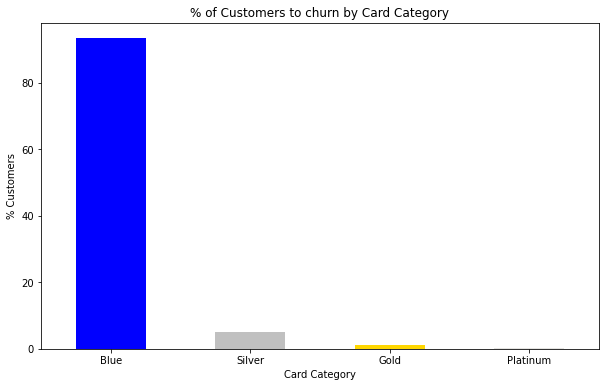

In [16]:
colors = ['#0000FF', '#C0C0C0', '#ffd700', '#E5E4E2']
ax = (df_churn['Card_Category'].value_counts()*100 / len(df_churn)).plot(kind='bar',
                                                       stacked = True,
                                                       rot = 0,
                                                       color = colors,
                                                       figsize=(10,6))
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Card Category')
ax.set_ylabel('% Customers')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)
ax.set_title('% of Customers to churn by Card Category');

## 4. Months_Inactive_12_mon

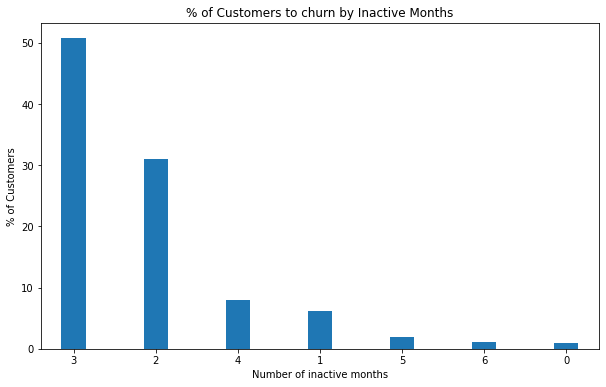

In [17]:
ax = (df_churn['Months_Inactive_12_mon'].value_counts() * 100 / len(df_churn)).plot(kind = 'bar',rot = 0, width = 0.3, figsize=(10,6))
ax.set_ylabel('% of Customers')
ax.set_xlabel('Number of inactive months')
ax.set_title('% of Customers to churn by Inactive Months');

## 5.  Link with customer age

In [18]:
df_churn['Age_Range'] = 0
for index, row in df_churn.iterrows():
    if 25 <= row['Customer_Age'] <= 34:
        df_churn.at[index, 'Age_Range'] = '25-34'
    elif 35 <= row['Customer_Age'] <= 44:
        df_churn.at[index, 'Age_Range'] = '35-44'
    elif 45 <= row['Customer_Age'] <= 60:
        df_churn.at[index, 'Age_Range'] = '45-60'
    else:
        df_churn.at[index, 'Age_Range'] = '60+'

C:\Users\danys\AppData\Local\Temp/ipykernel_2532/511261870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['Age_Range'] = 0
C:\Users\danys\AppData\Local\Temp/ipykernel_2532/511261870.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn.at[index, 'Age_Range'] = '60+'


In [19]:
df['Age_Range'] = 0
for index, row in df.iterrows():
    if 25 <= row['Customer_Age'] <= 34:
        df.at[index, 'Age_Range'] = '25-34'
    elif 35 <= row['Customer_Age'] <= 44:
        df.at[index, 'Age_Range'] = '35-44'
    elif 45 <= row['Customer_Age'] <= 60:
        df.at[index, 'Age_Range'] = '45-60'
    else:
        df.at[index, 'Age_Range'] = '60+'

In [20]:
df['Age_Range'].value_counts() * 100 / len(df)

45-60    54.774366
35-44    33.968599
25-34     7.257826
60+       3.999210
Name: Age_Range, dtype: float64

In [21]:
df_churn['Age_Range'].value_counts() * 100 / len(df_churn)

45-60    56.545790
35-44    33.681623
25-34     6.207744
60+       3.564843
Name: Age_Range, dtype: float64

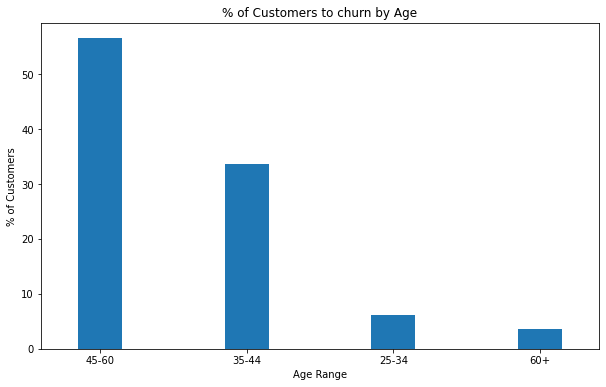

In [22]:
ax = (df_churn['Age_Range'].value_counts() * 100 / len(df_churn)).plot(kind = 'bar',rot = 0, width = 0.3, figsize=(10,6))
ax.set_ylabel('% of Customers')
ax.set_xlabel('Age Range')
ax.set_title('% of Customers to churn by Age');

In [23]:
# delete unnecessary columns
df.drop('Age_Range', axis=1, inplace=True)

#  5. What are the different ways to handle categorical columns?


Before training machine learning algorithm we need to convert categorical columns



In [24]:
cat_cols = ['Gender', 'Education_Level',
            'Marital_Status', 'Income_Category',
            'Card_Category']

There are several ways to tackle problem of categorical columns: label encoding, one-hot encoding, binary encoding, hashing trick.

# 6. Encode categorical columns with 1-hot encoding

How many binary columns after encoding do you have? Use `OneHotEncoder` from `sklearn.preprocessing` module with `sparse=False` parameter. See example below.


In [25]:
# Example dataframe
df_example = pd.DataFrame([['Male', 1], ['Female', 3], ['Female', 2]], columns=['Sex', 'Age'])
df_example

,Sex,Age
0,Male,1
1,Female,3
2,Female,2


In [26]:
from sklearn.preprocessing import OneHotEncoder

# Set names of categorical columns
categorical_columns = ['Sex']

# Create OneHotEncoder object
encoder = OneHotEncoder(sparse=False)

# Transform categorical columns and save them into array
cat_encoded = encoder.fit_transform(df_example[categorical_columns],)

# Save categorical columns to pandas.DataFrame, with correct column names
df_encoded = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Check the resulting DataFrame
df_encoded.head()

C:\Users\danys\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Sex_Female,Sex_Male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0


In [27]:
from sklearn.preprocessing import OneHotEncoder

# Set names of categorical columns
cat_cols = ['Gender', 'Education_Level',
            'Marital_Status', 'Income_Category',
            'Card_Category']

# Create OneHotEncoder object
encoder = OneHotEncoder(sparse=False)

# Transform categorical columns and save them into array
cat_encoded = encoder.fit_transform(df[cat_cols],)

# Save categorical columns to pandas.DataFrame, with correct column names
df_encoded = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(cat_cols))

# Check the resulting DataFrame
df_encoded.head()

C:\Users\danys\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


After the transformation, we got 23 binary columns.

# Drop original categorical columns and concat encoded with the numerical columns

assuming your encoded columns are in `df_encoded` variable

In [28]:
df = df.drop(cat_cols, axis=1)

In [29]:
df = pd.concat([df, df_encoded], axis=1)

In [30]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 7. Split data intro train and test parts

Set the size of the test set to 30%, use startification over the target column (to preserve target ratio in train and test sets). Use `random_state=10`. How many observations do you have in your test set?


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
df_train, df_test = train_test_split(df, stratify=df['Attrition_Flag'], test_size=0.3, random_state=10)

In [38]:
df_test.shape

(3039, 38)

# 8. This is a binary classification problem with  imbalanced classes, what are the appropriate metrics for this task?

select all which apply

- accuracy score
- $\textbf{roc auc score}$
- $\textbf{f1 score}$
- mean absolute error
- r-squared
- $\textbf{precision}$

# 9. Train a Random Forest Classifier on a `train` set

Use RandomForestClassifier with default hyperparameters. What is the f1 score of a trained model on a test set?

In [39]:
# Let us split train and test dataframes into X_train, X_test, y_train and y_test
X_train, X_test, y_train, y_test = df_train.drop("Attrition_Flag", axis=1), df_test.drop("Attrition_Flag", axis=1), df_train["Attrition_Flag"], df_test["Attrition_Flag"]

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, classification_report

In [32]:
rf_default = RandomForestClassifier()

In [33]:
rf_default.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred_rf = rf_default.predict(X_test)
y_pred_proba_rf = rf_default.predict_proba(X_test)[:, rf_default.classes_[rf_default.classes_ == 1][0]]
scores_rf_default = pd.DataFrame(
        {"scores" : [rf_default.score(X_test, y_test), roc_auc_score(y_test, y_pred_proba_rf), f1_score(y_test, y_pred_rf)]},
        index = ["accuracy", "roc_auc", "f1_score"]
)
print(scores_rf_default)

            scores
accuracy  0.950642
roc_auc   0.984431
f1_score  0.831461


In [111]:
import pickle
pickle.dump(rf_default, open('rf_model_churn', 'wb'))

# 10. Build a confusion matrix with a default probability threshold (0.5)

To analyse the resulting algorithm we will take a closer look on individual predictions. How many False Positives and False Negatives do you have?


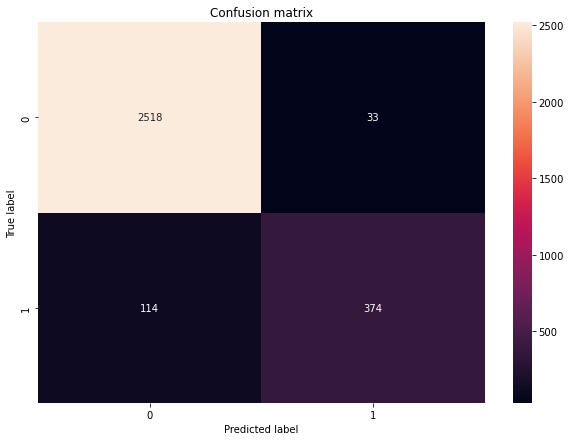

In [165]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_proba_rf>0.5)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 11. We will change probability threshold from 0.05 to 0.95 with step 0.05

What happens to the number of True Positives and to the number of False Negatives, as you increase the probability threshold?


In [166]:
import numpy as np

In [167]:
true_positives = []
false_negatives = []
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_proba_rf>t)
    tp, fn = cm[1,1], cm[1,0]
    true_positives.append(tp)
    false_negatives.append(fn)

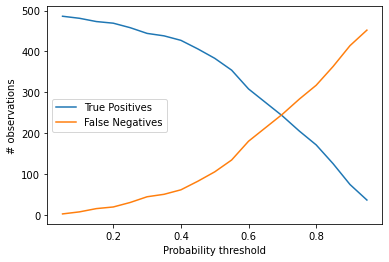

In [168]:
plt.plot(np.linspace(0.05,0.95,19), true_positives, label='True Positives')
plt.plot(np.linspace(0.05,0.95,19), false_negatives, label='False Negatives')
plt.xlabel('Probability threshold')
plt.ylabel('# observations')
plt.legend();

# 12. Estimate revenue

Let's consider a toy economic setup:
1. Each client earns a company $50\$$ per month
2. If you predict that a client will churn, the company can provide he with a discount of $200\$$ and the client will stay for another year

If the company does nothing (has no Churn model), then the revenue over the year will be:

$$S = N*50*12 + P*0$$

where N (negative) is number of non-Churn clients, and P (positive) is number of clients who Churn. If the company implements some Churn model, the revenue will be the following:

$$S = TN*50*12 + FP*(50*12-200) + TP*(50*12-200)  + FN * 0$$

where 
- TN are non-Churning clients, predicted as non-Churning (true negatives)
- FP are non-Churning clients, predicted as Churning (false positives)
- TP are Churning clients, predicted as Churning (true positives)
- FN are Churning clients, predicted as non-Churning (false negatives)

## Compute the revenue for different thresholds based on your model, what is the optimal probability threshold? Report two numbers divided by a comma, e.g. `0.5,1500000`

In [169]:
profit = []
profits = dict()
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_proba_rf>t)
    tn, fp, tp, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
    S = tn*50*12 + fp*(50*12-200) + tp*(50*12-200) 
    profits[S] = t
    profit.append(S)

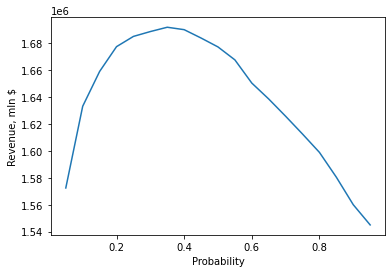

In [170]:
plt.plot(np.linspace(0.05,0.95,19), profit);
plt.xlabel('Probability')
plt.ylabel('Revenue, mln $');

In [171]:
dict(sorted(profits.items(), key=lambda profit: profit[0], reverse=True))

{1691600: 0.35,
 1689800: 0.39999999999999997,
 1688400: 0.3,
 1684800: 0.25,
 1683600: 0.44999999999999996,
 1677200: 0.2,
 1677000: 0.49999999999999994,
 1667400: 0.5499999999999999,
 1658800: 0.15,
 1650200: 0.6,
 1638400: 0.65,
 1633000: 0.1,
 1625600: 0.7,
 1612400: 0.75,
 1598800: 0.7999999999999999,
 1580400: 0.85,
 1572400: 0.05,
 1560000: 0.9,
 1545000: 0.95}

# 13. Compute economic value

Is there any economic value from introducing a ML model (compared to not using a model and not providing a discounts)?

First scenario - no ML model, no discounts; Second scenario - ML model from question 12.

In [40]:
df_non_churn = df_test.query('Attrition_Flag == 0')

In [42]:
# computation of the revenue without model
print(f'The revenue without any churn model is {df_non_churn.shape[0]*50*12}$')

The revenue without any churn model is 1530600$


In [43]:
print(f'The economic value with churn model equals to {1691600-df_non_churn.shape[0]*50*12}$')

The economic value with churn model equals to 161000$


# 14. Build a confusion matrix

assosiated with an optimal probability threshold. What happend to the number of False Positives and False Negatives, compared to the default probability threshold (question 10)?

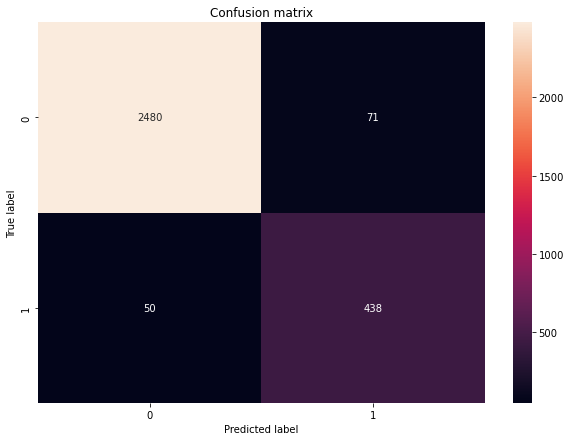

In [180]:
cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_proba_rf>0.35)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 15. What if the price to keep the client goes up to 500?

Does optimal probability treshold changes?

In [178]:
profit = []
profits = dict()
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_proba_rf>t)
    tn, fp, tp, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
    S = tn*50*12 + fp*(50*12-500) + tp*(50*12-500) 
    profits[S] = t
    profit.append(S)

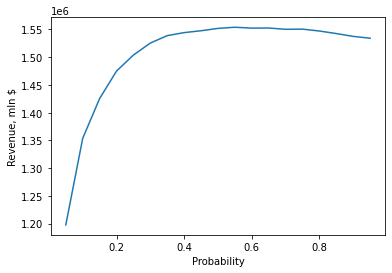

In [179]:
plt.plot(np.linspace(0.05,0.95,19), profit);
plt.xlabel('Probability')
plt.ylabel('Revenue, mln $');

In [181]:
dict(sorted(profits.items(), key=lambda profit: profit[0], reverse=True))

{1554000: 0.5499999999999999,
 1552600: 0.65,
 1552400: 0.6,
 1551900: 0.49999999999999994,
 1550600: 0.75,
 1550300: 0.7,
 1547700: 0.44999999999999996,
 1547200: 0.7999999999999999,
 1544300: 0.39999999999999997,
 1542600: 0.85,
 1538900: 0.35,
 1537500: 0.9,
 1534200: 0.95,
 1525500: 0.3,
 1503900: 0.25,
 1475000: 0.2,
 1425400: 0.15,
 1353700: 0.1,
 1197700: 0.05}

# 16. Built an assosiated confusion matrix

How many False Positives and False Negatives do you have?

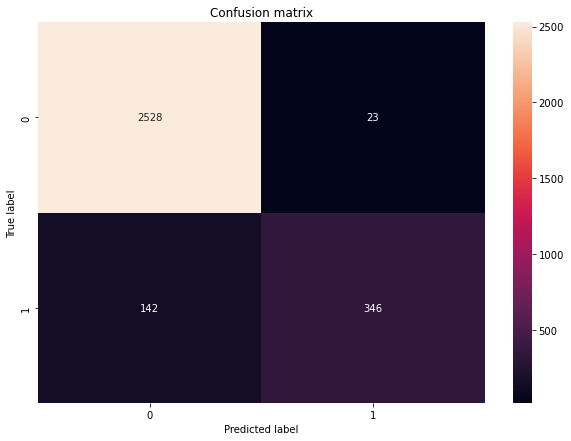

In [182]:
cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_proba_rf>0.55)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 17. Compare confusion matrices from 14 and 16



Two confusion matrices are built under different tresholds: the first one under 0.35, second - 0.55.
Therefore, comparing two confusion matricies gives us the following results:

- higher probability treshold leads to increase of FN since now we need to hit larger value to label prediction as "True" one;
- for the same reason, FP rate decreased;
- it means that now we detect more TN and less TP

Metrics:

$Precision_{1}$ = 438 / (438+71) = 0.86;
$Precision_{2}$ = 346 / (346+23) = 0.94

$Recall_{1}$ = 438 / (438+50) = 0.9;
$Recall_{2}$ = 346 / (346+142) = 0.71

$F_{1}score_{1}$ = 2 * 0.86 * 0.9 / (0.86+0.9) = 0.88;
$F_{1}score_{2}$ = 2 * 0.94 * 0.71 / (0.71+0.94) = 0.81

Since $F_{1}score$ takes into account both precision and recall, we tend to choose the first model with respect to second.

# 18. Train catboost

Train a catboost.CatBoostClassifier on a **unprocessed data** (no preprocessing for categorical columns) with default hyperparameters, see example below.

In [35]:
df = pd.read_csv('BankChurners.csv')

# We will drop two last columns from the table
df = df.drop([
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
    axis=1)

In [36]:
from catboost import CatBoostClassifier

In [37]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['Attrition_Flag'])

In [38]:
categorical_columns = ['Gender', 'Education_Level',
            'Marital_Status', 'Income_Category',
            'Card_Category']

In [39]:
clf = CatBoostClassifier()

In [40]:
clf.fit(df_train.drop('Attrition_Flag', axis=1), df_train['Attrition_Flag'], cat_features=categorical_columns)

Learning rate set to 0.023774
0:	learn: 0.6619419	total: 178ms	remaining: 2m 57s
1:	learn: 0.6257470	total: 220ms	remaining: 1m 49s
2:	learn: 0.6015602	total: 252ms	remaining: 1m 23s
3:	learn: 0.5756803	total: 287ms	remaining: 1m 11s
4:	learn: 0.5547169	total: 320ms	remaining: 1m 3s
5:	learn: 0.5340191	total: 354ms	remaining: 58.6s
6:	learn: 0.5128641	total: 388ms	remaining: 55.1s
7:	learn: 0.4924243	total: 420ms	remaining: 52.1s
8:	learn: 0.4698096	total: 465ms	remaining: 51.2s
9:	learn: 0.4525641	total: 506ms	remaining: 50.1s
10:	learn: 0.4366058	total: 541ms	remaining: 48.6s
11:	learn: 0.4204464	total: 572ms	remaining: 47.1s
12:	learn: 0.4078591	total: 607ms	remaining: 46.1s
13:	learn: 0.3947009	total: 644ms	remaining: 45.3s
14:	learn: 0.3825816	total: 683ms	remaining: 44.8s
15:	learn: 0.3717507	total: 725ms	remaining: 44.6s
16:	learn: 0.3570952	total: 764ms	remaining: 44.2s
17:	learn: 0.3491357	total: 801ms	remaining: 43.7s
18:	learn: 0.3372984	total: 836ms	remaining: 43.1s
19:	lea

162:	learn: 0.1024465	total: 6.27s	remaining: 32.2s
163:	learn: 0.1022098	total: 6.31s	remaining: 32.1s
164:	learn: 0.1019522	total: 6.34s	remaining: 32.1s
165:	learn: 0.1015297	total: 6.38s	remaining: 32.1s
166:	learn: 0.1010872	total: 6.43s	remaining: 32.1s
167:	learn: 0.1008202	total: 6.47s	remaining: 32s
168:	learn: 0.1003636	total: 6.52s	remaining: 32.1s
169:	learn: 0.1001318	total: 6.57s	remaining: 32.1s
170:	learn: 0.0996028	total: 6.61s	remaining: 32.1s
171:	learn: 0.0992350	total: 6.65s	remaining: 32s
172:	learn: 0.0987698	total: 6.7s	remaining: 32s
173:	learn: 0.0985192	total: 6.75s	remaining: 32s
174:	learn: 0.0981747	total: 6.8s	remaining: 32s
175:	learn: 0.0979184	total: 6.85s	remaining: 32.1s
176:	learn: 0.0977217	total: 6.89s	remaining: 32s
177:	learn: 0.0974966	total: 6.94s	remaining: 32.1s
178:	learn: 0.0970785	total: 7s	remaining: 32.1s
179:	learn: 0.0969566	total: 7.06s	remaining: 32.2s
180:	learn: 0.0967647	total: 7.11s	remaining: 32.2s
181:	learn: 0.0964057	total: 

323:	learn: 0.0705059	total: 14.4s	remaining: 30.1s
324:	learn: 0.0703559	total: 14.5s	remaining: 30.1s
325:	learn: 0.0702745	total: 14.5s	remaining: 30.1s
326:	learn: 0.0701320	total: 14.6s	remaining: 30.1s
327:	learn: 0.0699821	total: 14.7s	remaining: 30.1s
328:	learn: 0.0698486	total: 14.7s	remaining: 30.1s
329:	learn: 0.0696384	total: 14.8s	remaining: 30s
330:	learn: 0.0694484	total: 14.8s	remaining: 30s
331:	learn: 0.0692921	total: 14.9s	remaining: 30s
332:	learn: 0.0691317	total: 14.9s	remaining: 29.9s
333:	learn: 0.0690925	total: 15s	remaining: 29.9s
334:	learn: 0.0690385	total: 15.1s	remaining: 29.9s
335:	learn: 0.0689447	total: 15.1s	remaining: 29.9s
336:	learn: 0.0686683	total: 15.2s	remaining: 29.8s
337:	learn: 0.0685257	total: 15.2s	remaining: 29.8s
338:	learn: 0.0683453	total: 15.3s	remaining: 29.8s
339:	learn: 0.0682941	total: 15.3s	remaining: 29.8s
340:	learn: 0.0681015	total: 15.4s	remaining: 29.7s
341:	learn: 0.0679263	total: 15.4s	remaining: 29.7s
342:	learn: 0.067921

485:	learn: 0.0521059	total: 23.8s	remaining: 25.1s
486:	learn: 0.0520566	total: 23.8s	remaining: 25.1s
487:	learn: 0.0519103	total: 23.9s	remaining: 25s
488:	learn: 0.0518384	total: 23.9s	remaining: 25s
489:	learn: 0.0516895	total: 24s	remaining: 24.9s
490:	learn: 0.0515646	total: 24s	remaining: 24.9s
491:	learn: 0.0514534	total: 24.1s	remaining: 24.9s
492:	learn: 0.0513629	total: 24.1s	remaining: 24.8s
493:	learn: 0.0512650	total: 24.2s	remaining: 24.8s
494:	learn: 0.0511524	total: 24.3s	remaining: 24.8s
495:	learn: 0.0511215	total: 24.3s	remaining: 24.7s
496:	learn: 0.0510476	total: 24.4s	remaining: 24.7s
497:	learn: 0.0510350	total: 24.5s	remaining: 24.6s
498:	learn: 0.0509689	total: 24.5s	remaining: 24.6s
499:	learn: 0.0508210	total: 24.6s	remaining: 24.6s
500:	learn: 0.0507188	total: 24.6s	remaining: 24.5s
501:	learn: 0.0506305	total: 24.7s	remaining: 24.5s
502:	learn: 0.0505191	total: 24.8s	remaining: 24.5s
503:	learn: 0.0504804	total: 24.8s	remaining: 24.4s
504:	learn: 0.050406

648:	learn: 0.0412905	total: 32.7s	remaining: 17.7s
649:	learn: 0.0412582	total: 32.7s	remaining: 17.6s
650:	learn: 0.0411848	total: 32.8s	remaining: 17.6s
651:	learn: 0.0411372	total: 32.8s	remaining: 17.5s
652:	learn: 0.0410754	total: 32.9s	remaining: 17.5s
653:	learn: 0.0410536	total: 32.9s	remaining: 17.4s
654:	learn: 0.0409932	total: 33s	remaining: 17.4s
655:	learn: 0.0409494	total: 33s	remaining: 17.3s
656:	learn: 0.0409048	total: 33.1s	remaining: 17.3s
657:	learn: 0.0408724	total: 33.2s	remaining: 17.2s
658:	learn: 0.0408409	total: 33.2s	remaining: 17.2s
659:	learn: 0.0407707	total: 33.3s	remaining: 17.1s
660:	learn: 0.0407250	total: 33.3s	remaining: 17.1s
661:	learn: 0.0406617	total: 33.4s	remaining: 17.1s
662:	learn: 0.0406141	total: 33.5s	remaining: 17s
663:	learn: 0.0405557	total: 33.6s	remaining: 17s
664:	learn: 0.0404866	total: 33.6s	remaining: 16.9s
665:	learn: 0.0403860	total: 33.7s	remaining: 16.9s
666:	learn: 0.0403238	total: 33.8s	remaining: 16.9s
667:	learn: 0.040286

807:	learn: 0.0338978	total: 40.7s	remaining: 9.68s
808:	learn: 0.0338297	total: 40.8s	remaining: 9.63s
809:	learn: 0.0337815	total: 40.8s	remaining: 9.57s
810:	learn: 0.0337561	total: 40.9s	remaining: 9.52s
811:	learn: 0.0337037	total: 40.9s	remaining: 9.47s
812:	learn: 0.0336822	total: 41s	remaining: 9.42s
813:	learn: 0.0336508	total: 41s	remaining: 9.37s
814:	learn: 0.0336242	total: 41s	remaining: 9.31s
815:	learn: 0.0335913	total: 41.1s	remaining: 9.26s
816:	learn: 0.0335530	total: 41.1s	remaining: 9.21s
817:	learn: 0.0335439	total: 41.2s	remaining: 9.16s
818:	learn: 0.0335012	total: 41.2s	remaining: 9.11s
819:	learn: 0.0334393	total: 41.3s	remaining: 9.06s
820:	learn: 0.0334197	total: 41.3s	remaining: 9.01s
821:	learn: 0.0333755	total: 41.3s	remaining: 8.95s
822:	learn: 0.0333124	total: 41.4s	remaining: 8.9s
823:	learn: 0.0332619	total: 41.4s	remaining: 8.85s
824:	learn: 0.0332405	total: 41.5s	remaining: 8.8s
825:	learn: 0.0332169	total: 41.5s	remaining: 8.74s
826:	learn: 0.033169

969:	learn: 0.0285638	total: 48.1s	remaining: 1.49s
970:	learn: 0.0285135	total: 48.1s	remaining: 1.44s
971:	learn: 0.0284940	total: 48.2s	remaining: 1.39s
972:	learn: 0.0284492	total: 48.2s	remaining: 1.34s
973:	learn: 0.0284309	total: 48.3s	remaining: 1.29s
974:	learn: 0.0283888	total: 48.3s	remaining: 1.24s
975:	learn: 0.0283443	total: 48.4s	remaining: 1.19s
976:	learn: 0.0283127	total: 48.4s	remaining: 1.14s
977:	learn: 0.0282629	total: 48.5s	remaining: 1.09s
978:	learn: 0.0281958	total: 48.5s	remaining: 1.04s
979:	learn: 0.0281648	total: 48.6s	remaining: 991ms
980:	learn: 0.0281264	total: 48.6s	remaining: 942ms
981:	learn: 0.0280868	total: 48.7s	remaining: 892ms
982:	learn: 0.0280729	total: 48.7s	remaining: 842ms
983:	learn: 0.0280306	total: 48.8s	remaining: 793ms
984:	learn: 0.0279995	total: 48.8s	remaining: 743ms
985:	learn: 0.0279811	total: 48.9s	remaining: 694ms
986:	learn: 0.0279323	total: 48.9s	remaining: 644ms
987:	learn: 0.0279248	total: 49s	remaining: 595ms
988:	learn: 0.

In [41]:
y_pred_cb = clf.predict(df_test.drop('Attrition_Flag', axis=1))

In [95]:
y_pred_proba_cb = clf.predict_proba(df_test.drop('Attrition_Flag', axis=1))[:, 0]

In [59]:
# converting predicted categorical variables to numerical in order to compute f1 score
y_pred_cb[y_pred_cb == "Attrited Customer"] = 1
y_pred_cb[y_pred_cb == "Existing Customer"] = 0
df_test['Attrition_Flag'].replace(to_replace='Attrited Customer', value=1, inplace=True)
df_test['Attrition_Flag'].replace(to_replace='Existing Customer',  value=0, inplace=True)

In [58]:
print(f'F1 score for CatBoost model is {f1_score(list(df_test["Attrition_Flag"].values), list(y_pred_cb))}')

F1 score for CatBoost model is 0.9258474576271187


In [112]:
pickle.dump(clf, open('catboost_model_churn', 'wb'))

# 19. Compute ROC AUC score for your RandomForest and Catboost model

Comment on how increase/decrease in roc auc (machine learning metric) compares with increase/decrease of revenue (business metric). Propose how you could improve the economic model to make it more realistic (and how to use your ML model in this new setup). Upload a pdf, up to 500 words.

In [90]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [96]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
fpr_cb, tpr_cb, thresholds_cb = roc_curve(df_test['Attrition_Flag'], y_pred_proba_cb)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
roc_auc_cb = roc_auc_score(df_test['Attrition_Flag'], y_pred_proba_cb)

AUC for RF is 0.9844311295473971
AUC for CB is 0.994147264653527


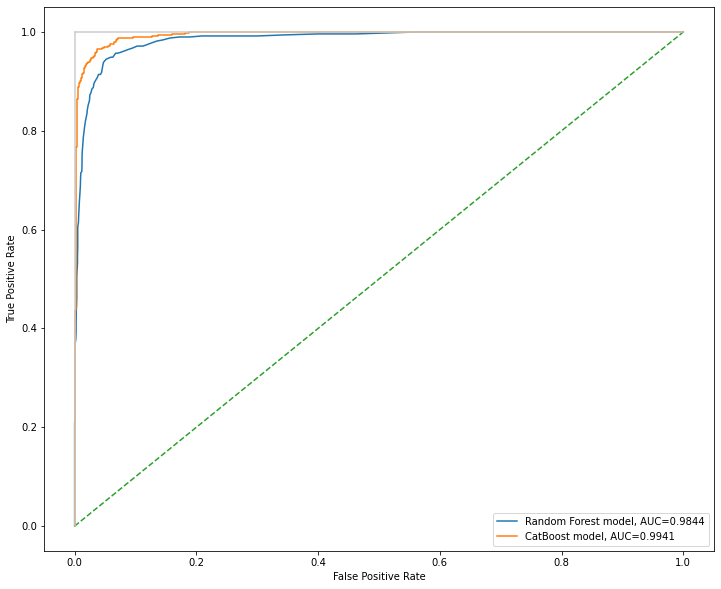

In [97]:
print(f'AUC for RF is {roc_auc_rf}')
print(f'AUC for CB is {roc_auc_cb}')

plt.figure(figsize=(12,10))
plt.plot(fpr_rf, tpr_rf, label="Random Forest model, AUC={:.4f}".format(roc_auc_rf))

plt.plot(fpr_cb, tpr_cb, label="CatBoost model, AUC={:.4f}".format(roc_auc_cb))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=0);

## 19.1 Computation of economic model for CatBoost 

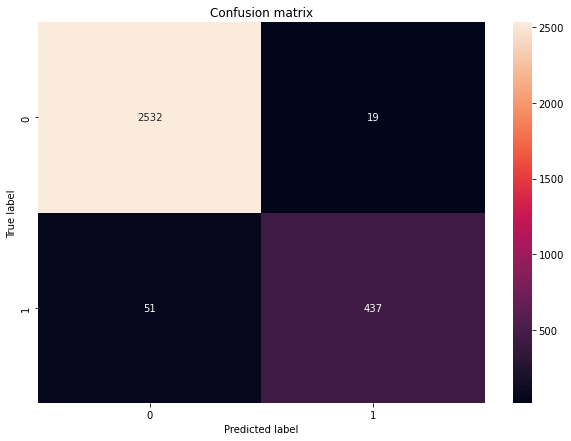

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_proba_cb>0.5)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [101]:
import numpy as np

profit = []
profits = dict()
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_proba_cb>t)
    tn, fp, tp, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
    S = tn*50*12 + fp*(50*12-200) + tp*(50*12-200) 
    profits[S] = t
    profit.append(S)

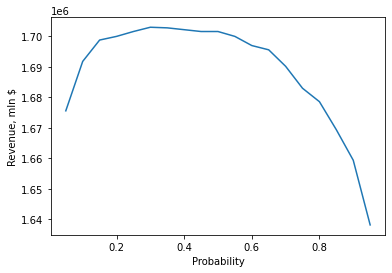

In [102]:
plt.plot(np.linspace(0.05,0.95,19), profit);
plt.xlabel('Probability')
plt.ylabel('Revenue, mln $');

In [103]:
dict(sorted(profits.items(), key=lambda profit: profit[0], reverse=True))

{1703000: 0.3,
 1702800: 0.35,
 1702200: 0.39999999999999997,
 1701600: 0.49999999999999994,
 1700000: 0.5499999999999999,
 1698800: 0.15,
 1697000: 0.6,
 1695600: 0.65,
 1691800: 0.1,
 1690200: 0.7,
 1683000: 0.75,
 1678600: 0.7999999999999999,
 1675600: 0.05,
 1669400: 0.85,
 1659400: 0.9,
 1638200: 0.95}

Therefore, the optimal theshold for CatBoost model is 0.3 with the maximum value of revenue $1.703.000\$$, which outweights the result from point $\textbf{12}$ (revenue for RF model) for $1.703.000-1.691.600=11.400\$$

# 20. Upload your ipynb solution